## Data summary for 1. Day of the Week 

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
# upload one file (later all - customer no starts with 1 every day)
df = pd.read_csv('./data/monday.csv', sep=';') # , index_col=0

In [24]:
df.tail(10)

,timestamp,customer_no,location
4874,2019-09-02 21:48:00,1444,spices
4875,2019-09-02 21:49:00,1430,fruit
4876,2019-09-02 21:49:00,1433,fruit
4877,2019-09-02 21:49:00,1440,spices
4878,2019-09-02 21:49:00,1441,spices
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy
4883,2019-09-02 21:50:00,1447,fruit


#### find customers for which no row entry with df['location']=='checkout' exists:

In [25]:
cust_checkout_no_record = []
for i in range(1, (df['customer_no'].nunique())+1):
    df_at = df[df['customer_no']==i] 
    # print(df_at)
    
    last_cust_occ = df_at.customer_no[-1:].values
    last_loc_occ = df_at.location[-1:].values
    # print(last_cust_occ, last_loc_occ)
    
    if last_loc_occ[0] != 'checkout':
        cust_checkout_no_record.append(last_cust_occ[0])

cust_checkout_no_record 

[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447]

#### update dataframe with checkout rows for unrecorded customer checkouts:

In [26]:
lst_dict = []

for cust_no in cust_checkout_no_record:
    
    # assuming that the remaining customers are checked out at 21:55
    new_row_dict = {'timestamp':'2019-09-02 21:55:00', 'customer_no':cust_no, 'location':'checkout'}    
    lst_dict.append(new_row_dict)

#append rows to the dataframe
df_updated = df.append(lst_dict, ignore_index=True)

df_updated.tail(15)

,timestamp,customer_no,location
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy
4883,2019-09-02 21:50:00,1447,fruit
4884,2019-09-02 21:55:00,1430,checkout
4885,2019-09-02 21:55:00,1433,checkout
4886,2019-09-02 21:55:00,1437,checkout
4887,2019-09-02 21:55:00,1439,checkout
4888,2019-09-02 21:55:00,1440,checkout


In [27]:
# Converting the timestamp (string) column to datetime
df.timestamp = pd.to_datetime(df.timestamp)
#type(df.index)

### total number of customers:

In [28]:
# unique customer_no
total_cust = df['customer_no'].nunique()
total_cust

1447

### total number of customers in each section:

In [29]:
# including several visits of one customer to a section
cus_count_by_loc = df.groupby('location')[['customer_no']].count()
cus_count_by_loc

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [30]:
# unique
unique_cus_count_by_loc = df.groupby('location')[['customer_no']].nunique()
unique_cus_count_by_loc

,customer_no
location,
checkout,1437
dairy,720
drinks,661
fruit,827
spices,584


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


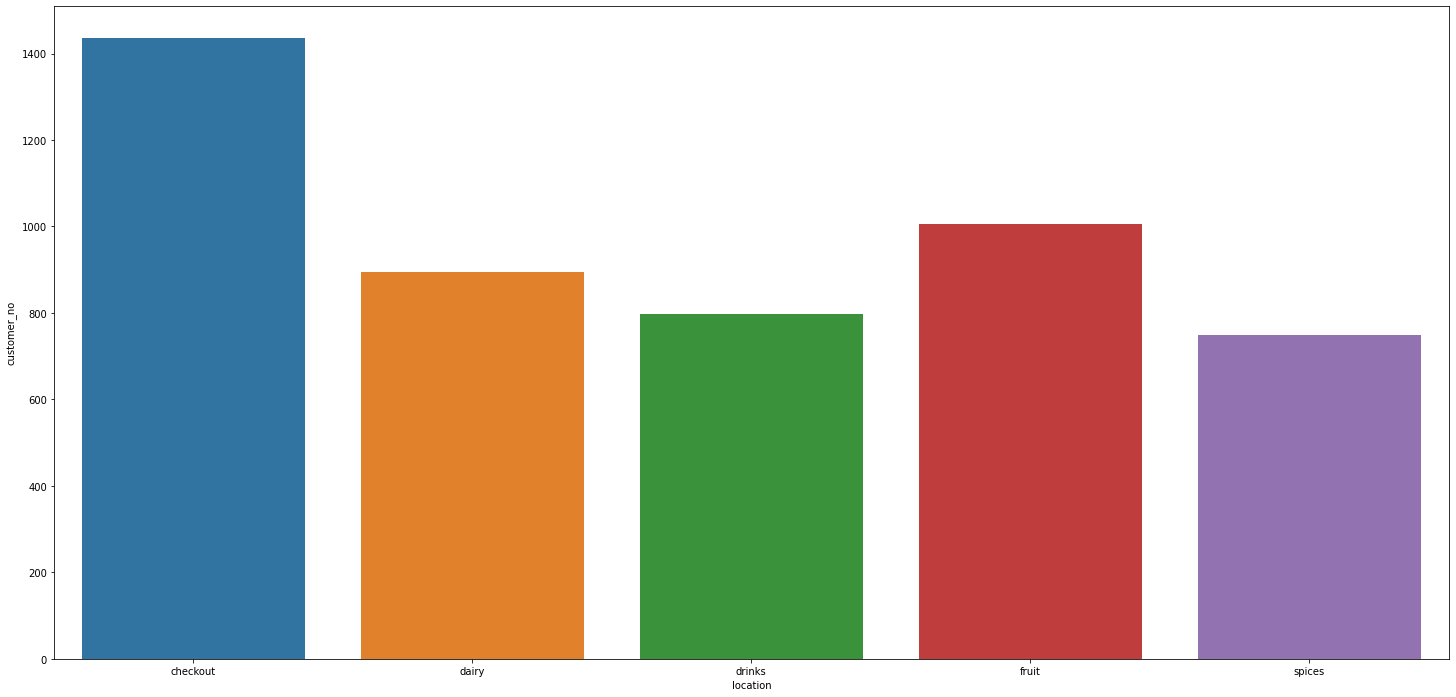

In [31]:
unique_cus_count_by_loc_plot=sns.barplot(unique_cus_count_by_loc.index, cus_count_by_loc.customer_no) 

# with matplotlib:
# df.groupby('location')[['customer_no']].count().plot.bar()

### plot of total number of customers in each section over time:

In [32]:
# create dummy column to be able to sum up customers
df['dummy'] = 1
df.head()

,timestamp,customer_no,location,dummy
0,2019-09-02 07:03:00,1,dairy,1
1,2019-09-02 07:03:00,2,dairy,1
2,2019-09-02 07:04:00,3,dairy,1
3,2019-09-02 07:04:00,4,dairy,1
4,2019-09-02 07:04:00,5,spices,1


In [33]:
# groubby timestamp
groupby_time_df = df.groupby('timestamp')[['dummy']].count()
groupby_time_df

,dummy
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
...,...
2019-09-02 21:46:00,6
2019-09-02 21:47:00,6
2019-09-02 21:48:00,7


<AxesSubplot:xlabel='timestamp'>

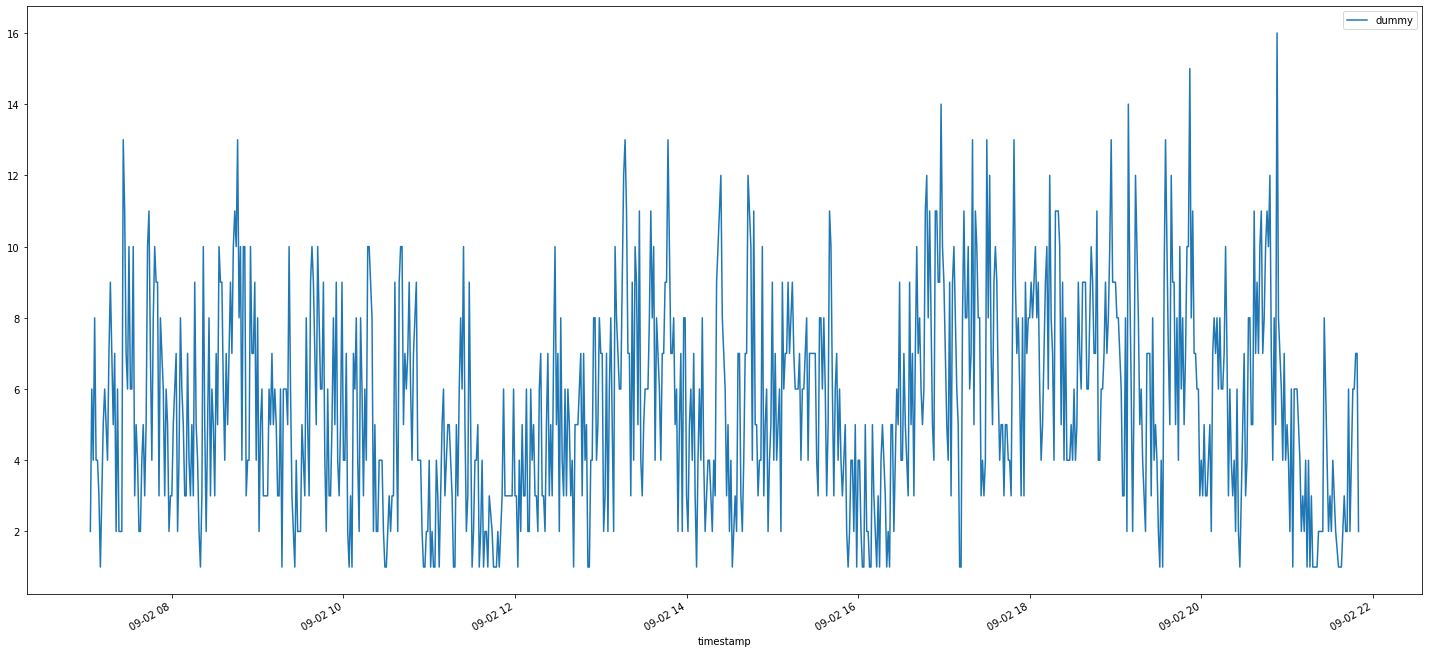

In [34]:
# total customer count over time
#plt.figure (figsize=(10,5))
plt.rcParams["figure.figsize"] = [25, 12]  # global 
groupby_time_df.reset_index().plot(x='timestamp', y='dummy')
# df.plot(x=df.index, y='customer_no')

In [35]:
# groubby timestamp and location
groupby_time_loc_df = df.groupby(by=['timestamp','location'])[['dummy']].count()
groupby_time_loc_df.head()

dummy
timestamp           location       
2019-09-02 07:03:00 dairy         2
2019-09-02 07:04:00 dairy         2
                    fruit         1
                    spices        3
2019-09-02 07:05:00 checkout      2

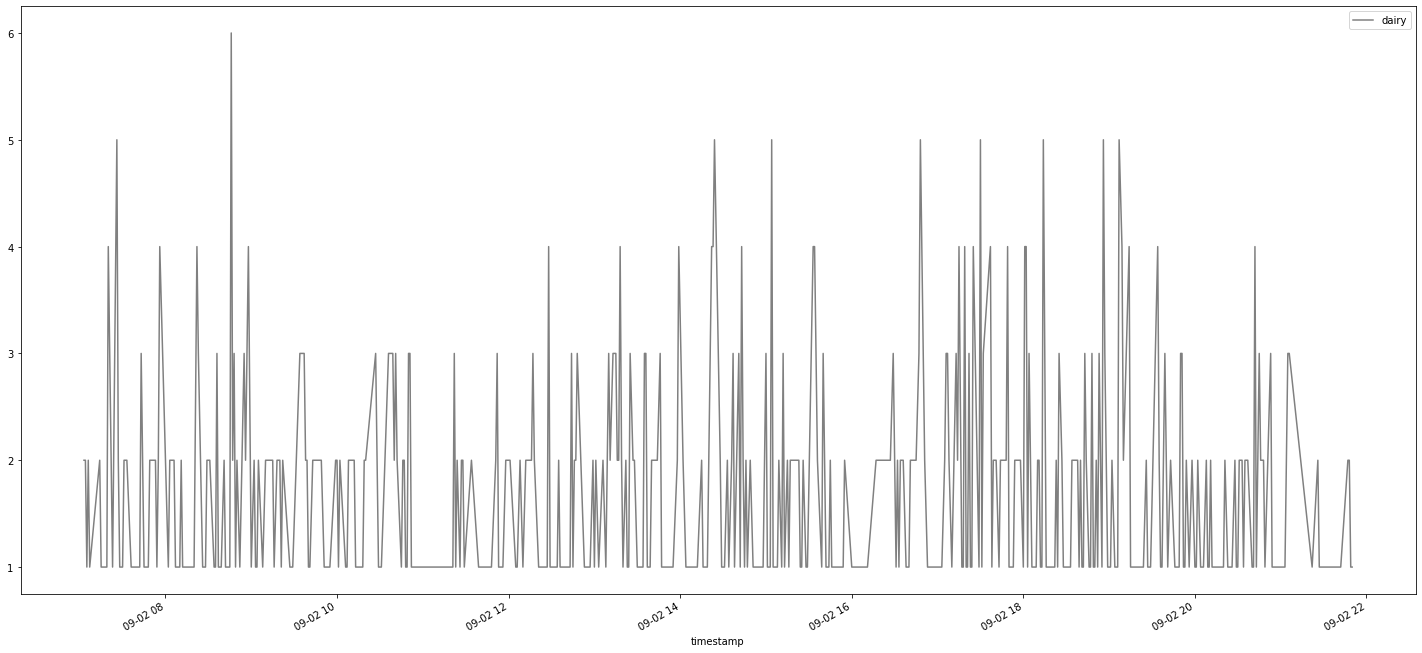

In [36]:
plot_df = groupby_time_loc_df.reset_index()

ax = plot_df[plot_df['location']=='dairy'].plot(x='timestamp', y='dummy', label='dairy', color = 'grey')

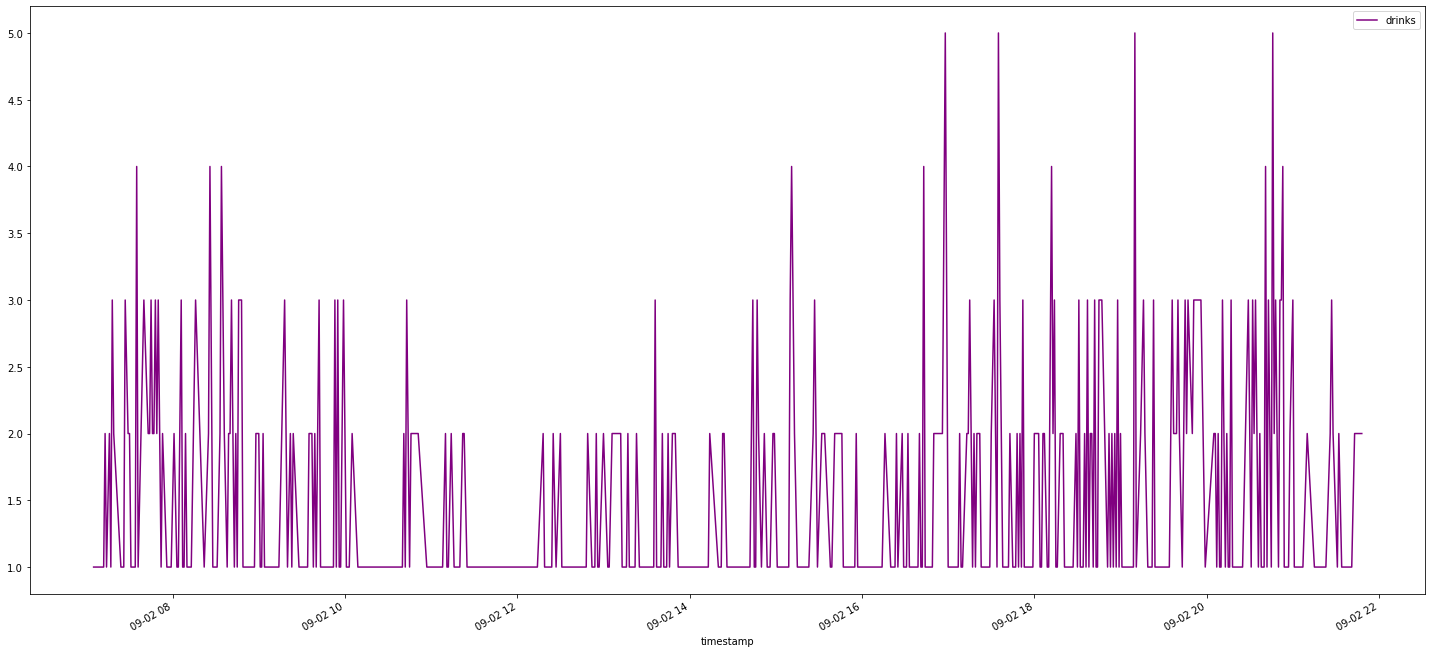

In [37]:
ax2= plot_df[plot_df['location']=='drinks'].plot(x='timestamp', y='dummy', label='drinks', color = 'purple') # ax = ax 

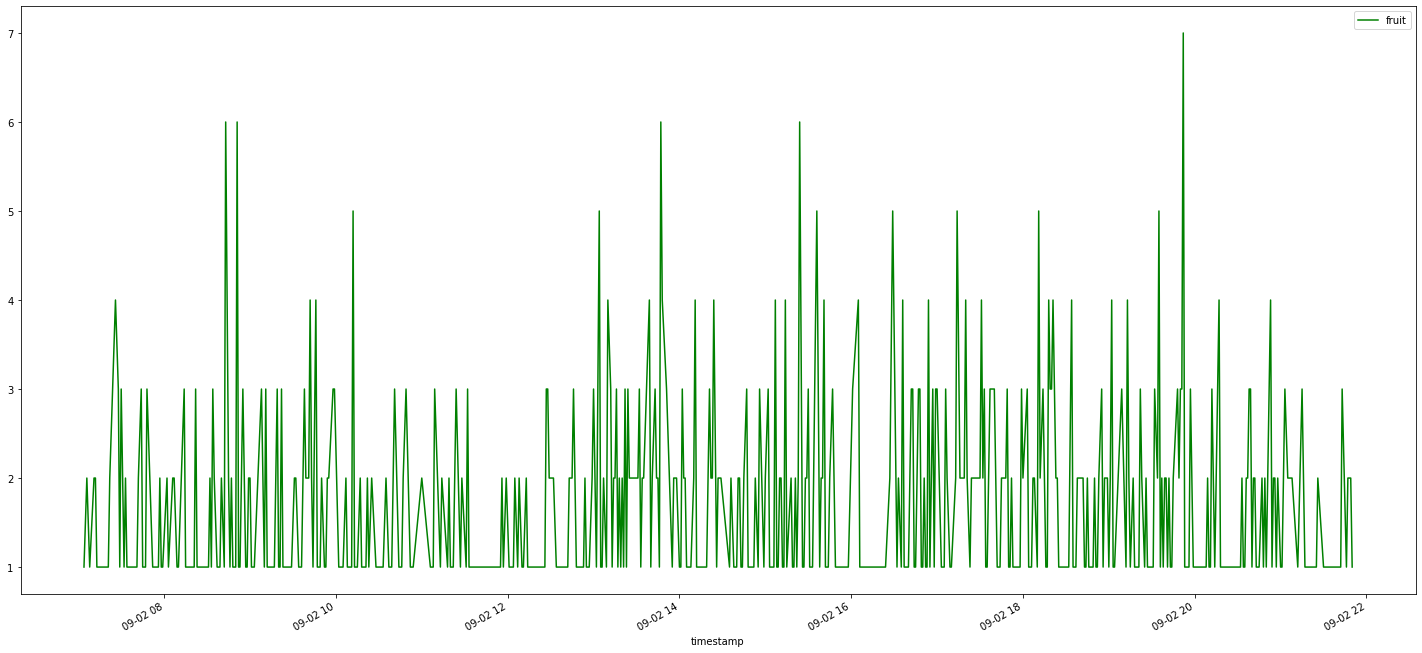

In [38]:

ax3 = plot_df[plot_df['location']=='fruit'].plot(x='timestamp', y='dummy', label='fruit', color='green')

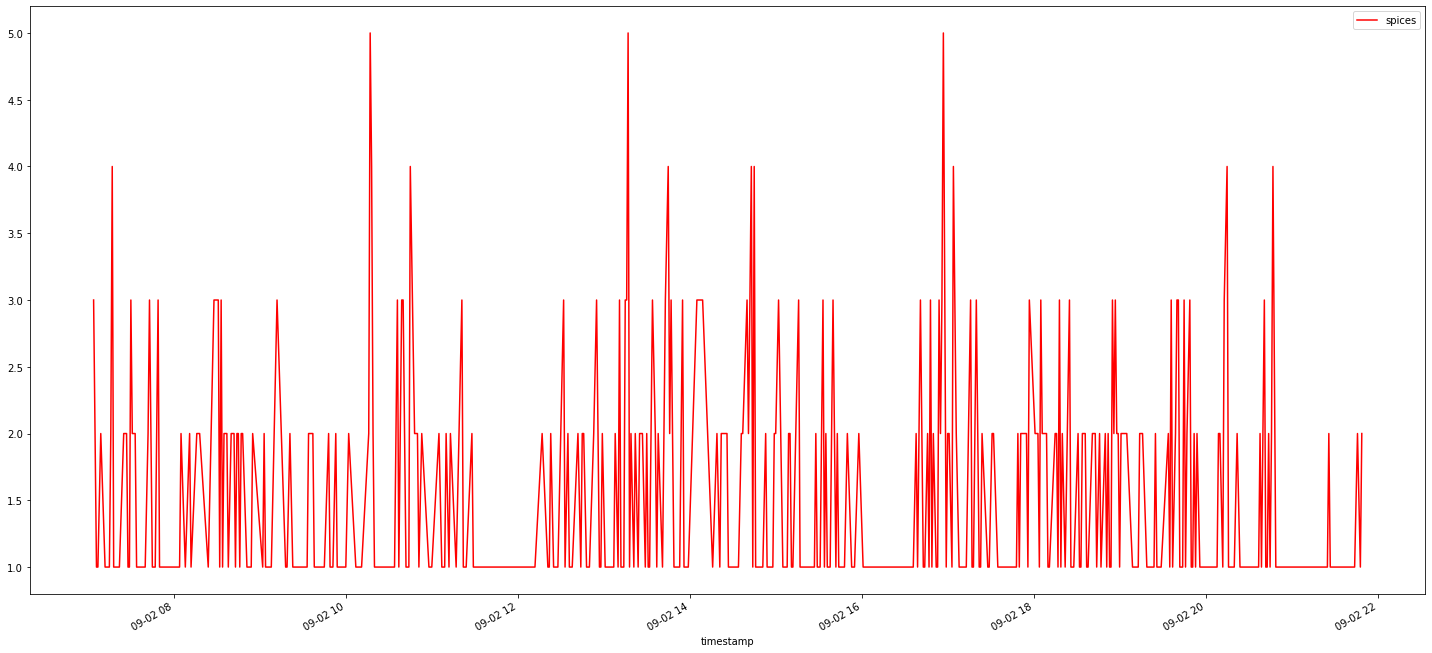

In [39]:
ax3= plot_df[plot_df['location']=='spices'].plot(x='timestamp', y='dummy', label='spices', color='red')

### number of customers at checkout over time:

<AxesSubplot:xlabel='timestamp'>

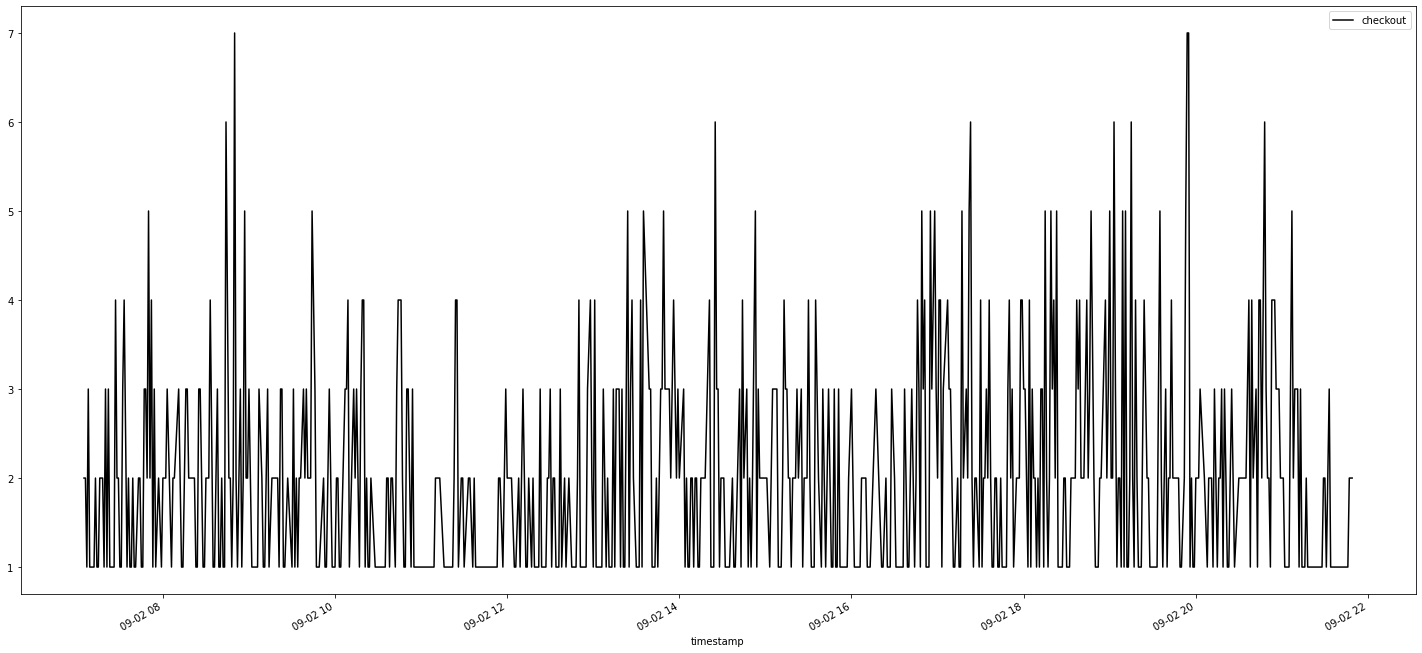

In [40]:
plot_df[plot_df['location']=='checkout'].plot(x='timestamp', y='dummy', label='checkout', color='black')

### time each customer spent in the market:
(missing: the not recorded checkouts at the end of the day need to be added to the df!)

In [41]:
minutes_spend_list = []

# loop through the customer id columnn:
for i in range(1, (df['customer_no'].nunique())+1):
    df_at = df[df['customer_no']==i] 
    first_occ = df_at.timestamp[:1].values # get first and last timestamp for current customer_no
    last_occ = df_at.timestamp[-1:].values
    # print(first_occ, last_occ)
    
    timediff = (last_occ - first_occ)/60000000000 # nanoseconds to minutes
    
    # print('customer', i ,'spend', timediff.tolist()[0], 'minutes in the supermarket') 
    minutes_spend_list.append(timediff.tolist()[0])


In [42]:
average = sum(minutes_spend_list) / len(minutes_spend_list)
max_time = max(minutes_spend_list)
min_time = min(minutes_spend_list)

def most_common(lst):
    return max(set(lst), key=lst.count)

most_common_time = most_common(minutes_spend_list)

print(
    'The average time customers spend in the supermarket is: \n', 
      round(average, 2), 'minutes \n', 
    'The maximum time customers spend in the supermarket is: \n',
      round(max_time, 2), 'minutes \n', 
    'The minimum time customers spend in the supermarket is: \n',
      round(min_time, 2), 'minute(s) \n', 
    'The most commom time customers spend in the supermarket is: \n',
      round(most_common_time, 2), 'minute(s)  \n', 
     )

The average time customers spend in the supermarket is: 
 6.44 minutes 
 The maximum time customers spend in the supermarket is: 
 51 minutes 
 The minimum time customers spend in the supermarket is: 
 0 minute(s) 
 The most commom time customers spend in the supermarket is: 
 1 minute(s)  



### total number of customers in the supermarket over time:


### Plot of the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”):